In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import SimpleITK as sitk
import os
import pandas as pd
import numpy as np
import pickle


from preprocessing.calibration_phantom import get_rod_coordiantes_list
from preprocessing.calibrate_image import cut_images

In [2]:
# Set path variables
DATA_FOLDER = r"..\data\PCCT\1_2208_04835_R\Ex_vivo_bone_0_20_Br89_Q3_R_10.nii.gz".encode('unicode_escape').decode('utf-8')
TARGET_FOLDER = r"..\data\PCCT\1_2208_04835_R\Ex_vivo_bone_0_20_Br89_Q3_R_10_CUT.nii.gz".encode('unicode_escape').decode('utf-8')

# Number of slices after which to cut the series
SLICE_CUT = 1900

In [43]:
# Load the scans in given path
image = sitk.ReadImage(DATA_FOLDER)

# Cut off the image series
image = image[:,:,:SLICE_CUT]

In [45]:
# Load rods coordinates if they exist
# Detect location of rods in the image
rod_coordinates_list = get_rod_coordiantes_list(image)
rod_coordinates_list = sorted(rod_coordinates_list, key=lambda x: x[0])

# Save the coordinated to a csv file
if not os.path.exists(TARGET_FOLDER):
    os.mkdir(TARGET_FOLDER)
pickle.dump(rod_coordinates_list, open(os.path.join(TARGET_FOLDER, "rod_coordinates_list.pkl"), "wb"))

OSError: [WinError 87] The parameter is incorrect

In [46]:
# Cut calibration phantoms out of the images
#images = cut_images(image, rod_coordinates_list)

images = image[:, :790, :]

(500, [290, 306, 324, 336], [509, 511, 497, 519], [63, 68, 64, 74])


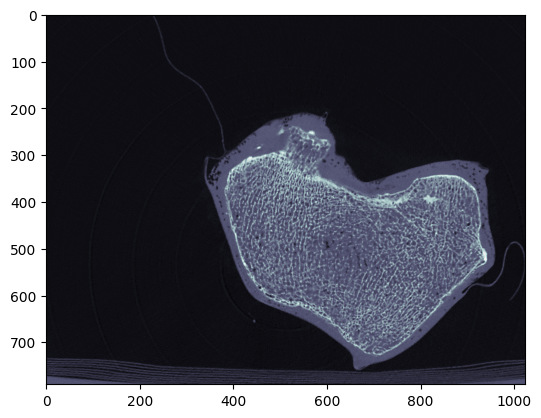

In [47]:
plt.imshow(sitk.GetArrayFromImage(images[:,:,500]), cmap=plt.cm.bone)
print(rod_coordinates_list[500])

In [ ]:
# Save the images
sitk.WriteImage(images, TARGET_FOLDER)

IndexError: index 300 is outside the extent for dimension 2 with size 252

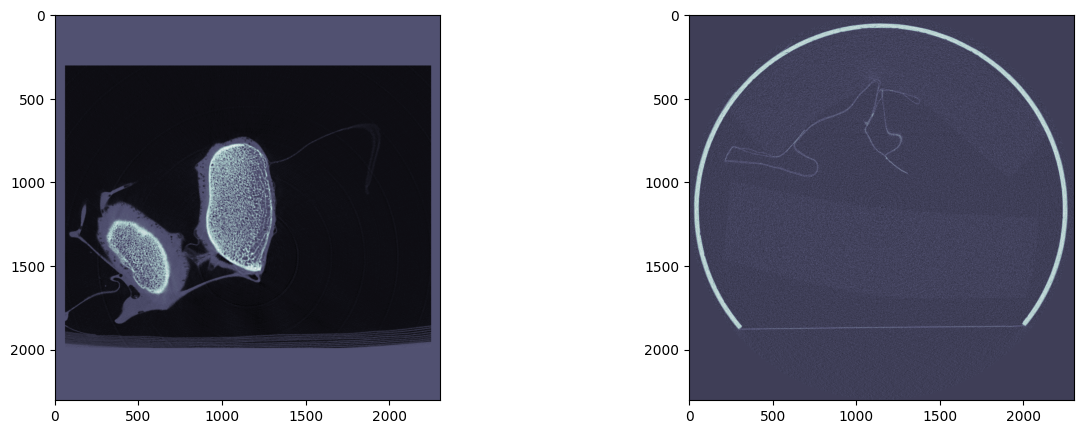

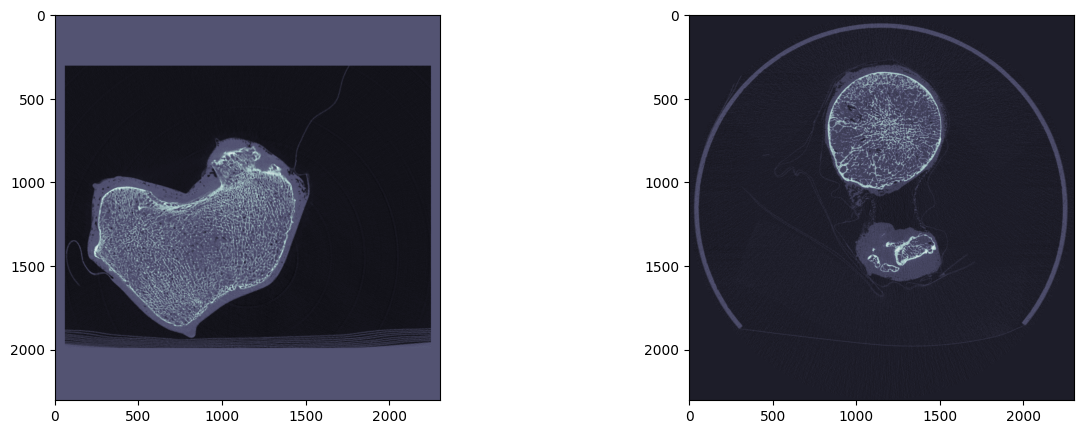

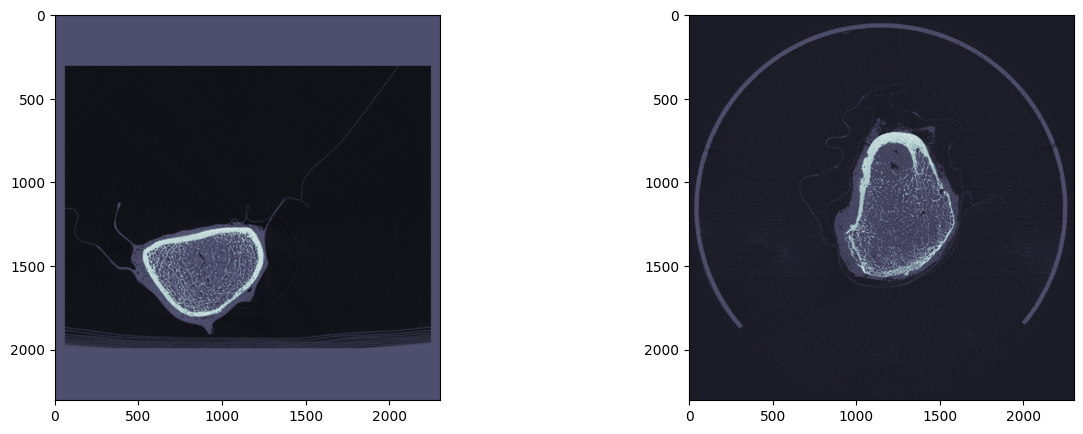

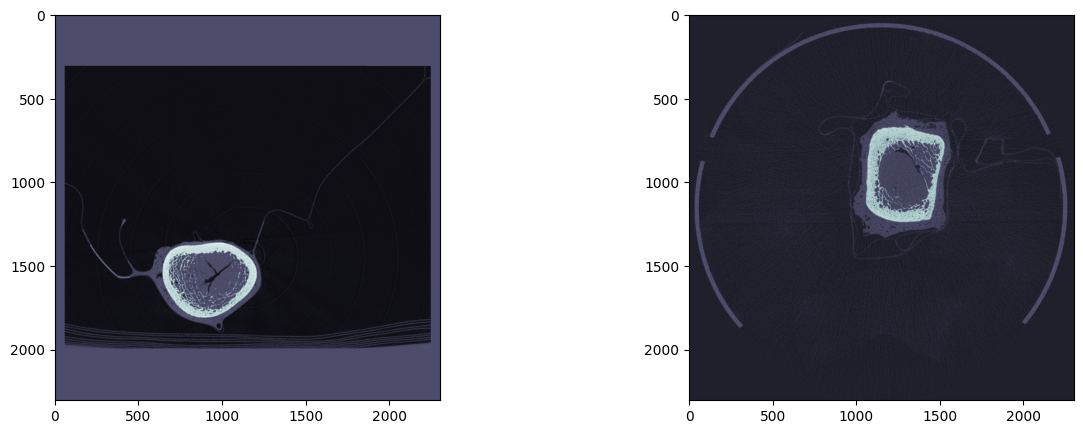

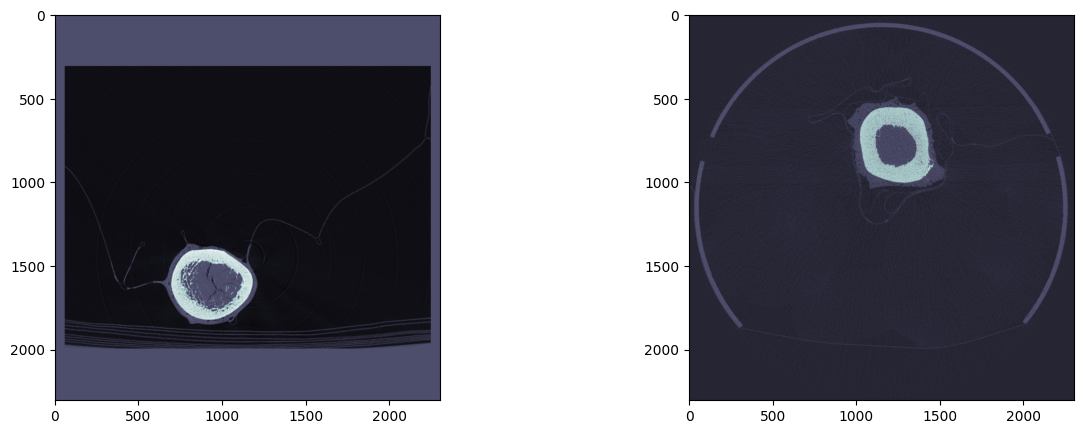

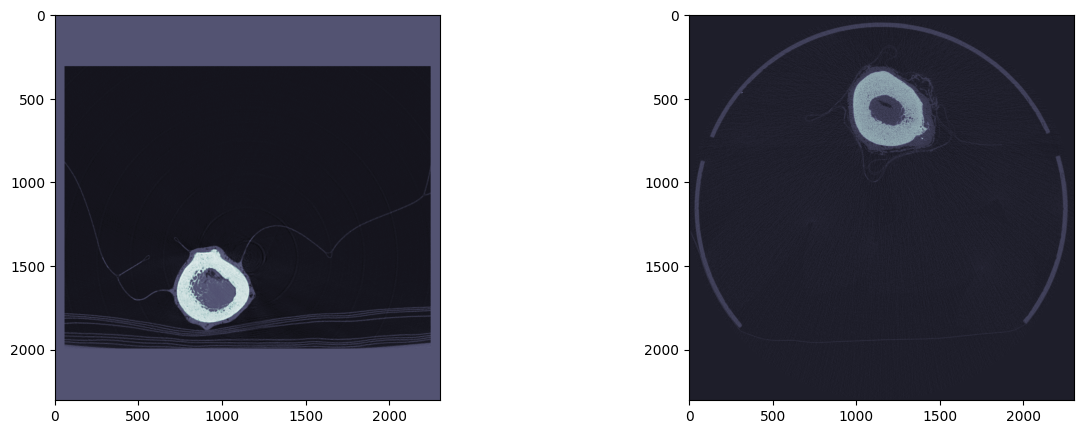

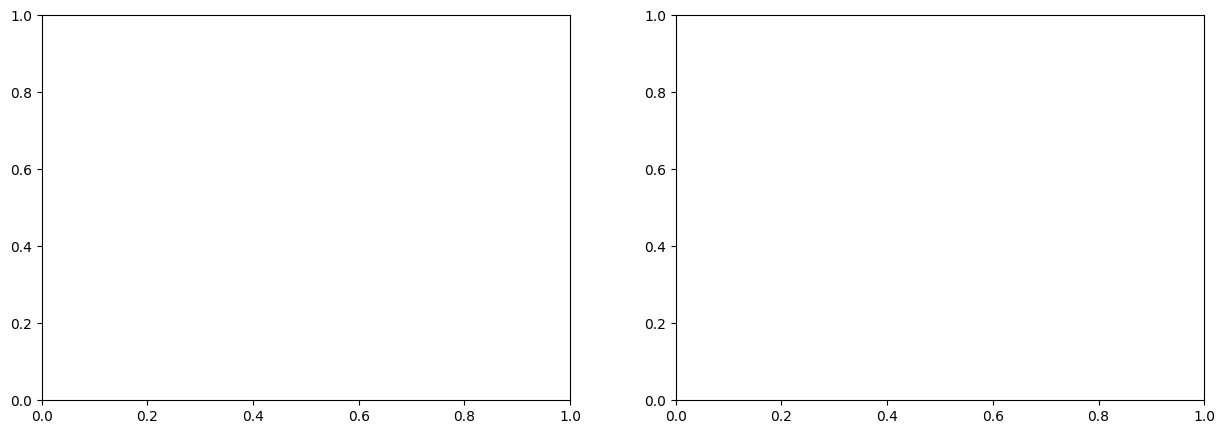

In [4]:
results = sitk.ReadImage(r"..\data\out\result.0.mha".encode('unicode_escape').decode('utf-8'))
hr_img = sitk.ReadImage(r"..\data\HR-pQCT\2208_04835_R\3035_linear_attenuation_1cm_3035.nii.gz".encode('unicode_escape').decode('utf-8'))

for i in range(10):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].imshow(sitk.GetArrayFromImage(results[:,:,i*50]), cmap=plt.cm.bone)
    ax[1].imshow(sitk.GetArrayFromImage(hr_img[:,:,i*50]), cmap=plt.cm.bone)

In [14]:
from preprocessing.utils import read_dicom_series, save_image
hr_img = read_dicom_series(r"..\data\HR-pQCT\2208_04835_R_Part_1".encode('unicode_escape').decode('utf-8'))
save_image(hr_img, r"..\data\HR-pQCT\2208_04835_R_Part_1.nii.gz".encode('unicode_escape').decode('utf-8'))



In [12]:
PATH = r"..\data\HR-pQCT\2208_04835_R"
files = os.listdir(PATH)
files.sort()
#files = [file for file in files if file.endswith(".DCM_1")]
size = len(files)
list_of_files = [files[:size//2], files[size//2:]]

for i, files in enumerate(list_of_files):
    for file in files:
        os.rename(os.path.join(PATH, file), os.path.join(PATH + f"_Part_{i}" , file))


In [16]:
hr_part_0 = sitk.ReadImage(r"..\data\HR-pQCT\2208_04835_R_Part_0.nii.gz".encode('unicode_escape').decode('utf-8'))

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: D:\a\1\sitk-build\ITK\Modules\IO\NIFTI\src\itkNiftiImageIO.cxx:589:
ITK ERROR: NiftiImageIO(00000181D2EA58A0): nifti_image_load failed for file: ..\\data\\HR-pQCT\\2208_04835_R_Part_0.nii.gz